In [93]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

按照线性模型生成数据集同时可视化

features: tensor([ 0.1122, -1.2902]) 
label: tensor([8.8164])


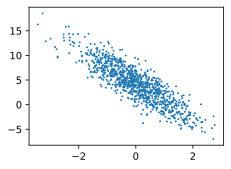

In [94]:
def synthetic_data(w, b, num_examples):  #@save
    """生成X和y，其中的关系为y=Xw+b+噪声，w=[2,-3.4]^T"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    # 产生一个服从N(0,1)，大小为num_examples X len(w)的正态分布矩阵
    # 这里服从正态分布的意思是每一个数是从正态分布中等可能取出的，而不是整个矩阵呈现正态分布的样子
    y = torch.matmul(X, w) + b
    # 计算矩阵向量积Xw，然后加上b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
    # 最后的y是一个列向量，X是一个1000 x 2的矩阵

true_w = torch.tensor([2, -3.4]) # 生成基本数据结构：张量
true_b = 4.2
# 实际的w和b如上，也就是y=X[2, -3.4] + 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# 生成特征和标签
print('features:', features[0],'\nlabel:', labels[0])
# 取一组特征和标签样本输出观察
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);
# 可视化样本

In [95]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print("w:", w, "\nb:", b)
# 初始化模型参数

w: tensor([[-0.0078],
        [ 0.0102]], requires_grad=True) 
b: tensor([0.], requires_grad=True)


In [96]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
# 定义一堆东西

In [97]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')
# 模型训练

epoch 1, loss 0.034591
epoch 2, loss 0.000120
epoch 3, loss 0.000051
epoch 4, loss 0.000051
epoch 5, loss 0.000051
epoch 6, loss 0.000051
epoch 7, loss 0.000051
epoch 8, loss 0.000051
epoch 9, loss 0.000051
epoch 10, loss 0.000051
w的估计误差: tensor([0.0004, 0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)
